In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


housesPath = './Datasets/house.csv'

In [212]:
df = pd.read_csv(housesPath)

In [213]:
df_def = df.copy()
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,181344.083590
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,78013.313167
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130000.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163900.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214900.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [214]:
# Showing First 5 records
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Preprocessing

## Deal with Null Values

In [215]:
def null_check(df):
    missing_values = df.isnull().sum()
    for column,count_null in missing_values.items():
        if count_null > 0:
            print(f" {column} : { count_null }") 
    

In [216]:
null_check(df)

 MSZoning : 4
 LotFrontage : 486
 Alley : 2721
 Utilities : 2
 Exterior1st : 1
 Exterior2nd : 1
 MasVnrType : 24
 MasVnrArea : 23
 BsmtQual : 81
 BsmtCond : 82
 BsmtExposure : 82
 BsmtFinType1 : 79
 BsmtFinSF1 : 1
 BsmtFinType2 : 80
 BsmtFinSF2 : 1
 BsmtUnfSF : 1
 TotalBsmtSF : 1
 Electrical : 1
 BsmtFullBath : 2
 BsmtHalfBath : 2
 KitchenQual : 1
 Functional : 2
 FireplaceQu : 1420
 GarageType : 157
 GarageYrBlt : 159
 GarageFinish : 159
 GarageCars : 1
 GarageArea : 1
 GarageQual : 159
 GarageCond : 159
 PoolQC : 2909
 Fence : 2348
 MiscFeature : 2814
 SaleType : 1


In [217]:
# Deleting Rows with less than 5% null values on columns
delete_threshold = 0.05 * df.shape[0]
missing_values = df.isnull().sum()
pre_len = len(df)
columns_affected = 0 
for column,count_null in missing_values.items():
    if count_null != 0 and count_null < delete_threshold:
        print(f"True for {column}")
        columns_affected += 1
        df.dropna(subset=column, inplace=True)
after_len = len(df)
print(f"{columns_affected} columns were affected and { pre_len - after_len } rows removed, {(pre_len - after_len)/df.shape[0]*100} % of dataset lost!")

True for MSZoning
True for Utilities
True for Exterior1st
True for Exterior2nd
True for MasVnrType
True for MasVnrArea
True for BsmtQual
True for BsmtCond
True for BsmtExposure
True for BsmtFinType1
True for BsmtFinSF1
True for BsmtFinType2
True for BsmtFinSF2
True for BsmtUnfSF
True for TotalBsmtSF
True for Electrical
True for BsmtFullBath
True for BsmtHalfBath
True for KitchenQual
True for Functional
True for GarageCars
True for GarageArea
True for SaleType
23 columns were affected and 120 rows removed, 4.287245444801715 % of dataset lost!


In [218]:
null_check(df)

 LotFrontage : 465
 Alley : 2606
 FireplaceQu : 1342
 GarageType : 141
 GarageYrBlt : 142
 GarageFinish : 142
 GarageQual : 142
 GarageCond : 142
 PoolQC : 2789
 Fence : 2241
 MiscFeature : 2700


count    2334.000000
mean       69.100686
std        23.352398
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


<Axes: >

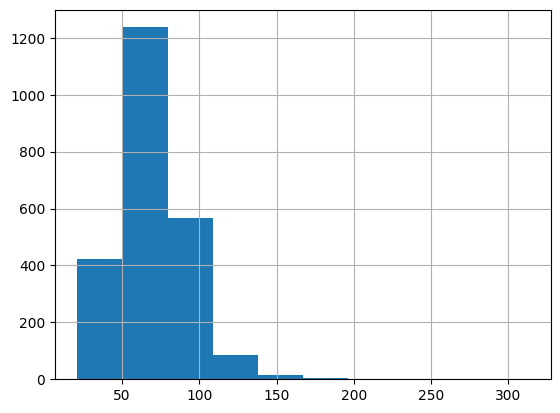

In [219]:
print(df["LotFrontage"].describe())
df["LotFrontage"].hist()

In [220]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
null_check(df)

 Alley : 2606
 FireplaceQu : 1342
 GarageType : 141
 GarageYrBlt : 142
 GarageFinish : 142
 GarageQual : 142
 GarageCond : 142
 PoolQC : 2789
 Fence : 2241
 MiscFeature : 2700


In [221]:
df["Alley"].value_counts()

Grvl    118
Pave     75
Name: Alley, dtype: int64

In [222]:
df["Alley"] = df["Alley"].fillna("No Access")
null_check(df)

 FireplaceQu : 1342
 GarageType : 141
 GarageYrBlt : 142
 GarageFinish : 142
 GarageQual : 142
 GarageCond : 142
 PoolQC : 2789
 Fence : 2241
 MiscFeature : 2700


In [223]:
print(df["FireplaceQu"].value_counts(),f"\n {4*'======'}")
df["FireplaceQu"] = df["FireplaceQu"].fillna("No FirePlace")
null_check(df)

Gd    721
TA    578
Fa     73
Po     44
Ex     41
Name: FireplaceQu, dtype: int64 
 GarageType : 141
 GarageYrBlt : 142
 GarageFinish : 142
 GarageQual : 142
 GarageCond : 142
 PoolQC : 2789
 Fence : 2241
 MiscFeature : 2700


In [224]:
garage_attrs = ["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]
for attr in garage_attrs:
    df[attr] = df[attr].fillna("No Garage")
null_check(df)

 PoolQC : 2789
 Fence : 2241
 MiscFeature : 2700


In [225]:
df["PoolQC"] = df["PoolQC"].fillna("No Pool")
df["Fence"] = df["Fence"].fillna("No Fence")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
null_check(df)

## Dealing with Outliers

In [226]:
first_quantile = df["SalePrice"].quantile(0.25) 
third_quantile = df["SalePrice"].quantile(0.75) 
IQR = third_quantile - first_quantile 
outlier_seal = first_quantile - 1.5*IQR
outlier_floor = third_quantile + 1.5*IQR

outliers = df[(df["SalePrice"] < outlier_seal ) | (df["SalePrice"] > outlier_floor)]
outliers.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1376.417391,44.565217,79.556522,14477.104348,7.513043,5.356522,1986.826087,1995.034783,282.817391,742.156522,...,146.617391,68.460870,18.356522,5.278261,17.008696,4.826087,31.304348,6.252174,2007.808696,420327.408696
std,863.511994,30.619089,24.023085,20493.965517,1.778849,1.085723,27.503831,17.376598,307.830598,646.433462,...,145.522385,74.228226,55.166286,34.427791,60.093129,51.754017,284.809945,2.749301,1.356567,81721.840338
min,12.000000,20.000000,21.000000,1484.000000,4.000000,2.000000,1890.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,341000.000000
25%,626.000000,20.000000,64.000000,8801.500000,6.000000,5.000000,1970.500000,1993.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,372402.000000
50%,1374.000000,30.000000,77.000000,11844.000000,8.000000,5.000000,2003.000000,2003.000000,208.000000,816.000000,...,140.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,394432.000000
75%,2133.000000,60.000000,92.500000,14191.500000,9.000000,5.000000,2006.000000,2007.000000,443.000000,1325.000000,...,205.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,439390.000000
max,2912.000000,160.000000,174.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2188.000000,...,857.000000,444.000000,291.000000,304.000000,410.000000,555.000000,3000.000000,12.000000,2010.000000,755000.000000


In [227]:
outlier_indexes = outliers.index
df = df.drop(outlier_indexes)

## Find Paradoxes

In [228]:
df = df.sort_values("SalePrice", ascending=False)
mask = (df['LotArea'] > df['LotArea'].shift()) 
mask.value_counts()

False    1354
True     1330
Name: LotArea, dtype: int64

In [229]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1417,1418,60,RL,68.0,16545,Pave,No Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2009,WD,Normal,340000
1739,1740,120,FV,68.0,3830,Pave,Pave,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,1,2009,New,Partial,340000
377,378,60,FV,102.0,11143,Pave,No Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2007,WD,Normal,340000
409,410,60,FV,85.0,10800,Pave,No Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,4,2008,New,Partial,339750
1538,1539,70,RM,50.0,9000,Pave,Grvl,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,4,2010,WD,Normal,339750
994,995,20,RL,96.0,12456,Pave,No Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,7,2009,WD,Normal,337500
1643,1644,60,FV,68.0,8470,Pave,No Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,10,2009,WD,Normal,337000
1477,1478,20,RL,90.0,11520,Pave,No Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,6,2010,WD,Normal,337000
763,764,60,RL,82.0,9430,Pave,No Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,7,2009,WD,Normal,337000
981,982,60,RL,98.0,12203,Pave,No Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,7,2009,WD,Normal,336000


In [230]:
## Reasons -> More LotFrontage , Has Pool, Fence, ( 3 to 2 ) 

# Visualization and Exploration

## 1.Mean Price Visualazing in each neighberhoud 

<bound method Axes.plot of <Axes: >>

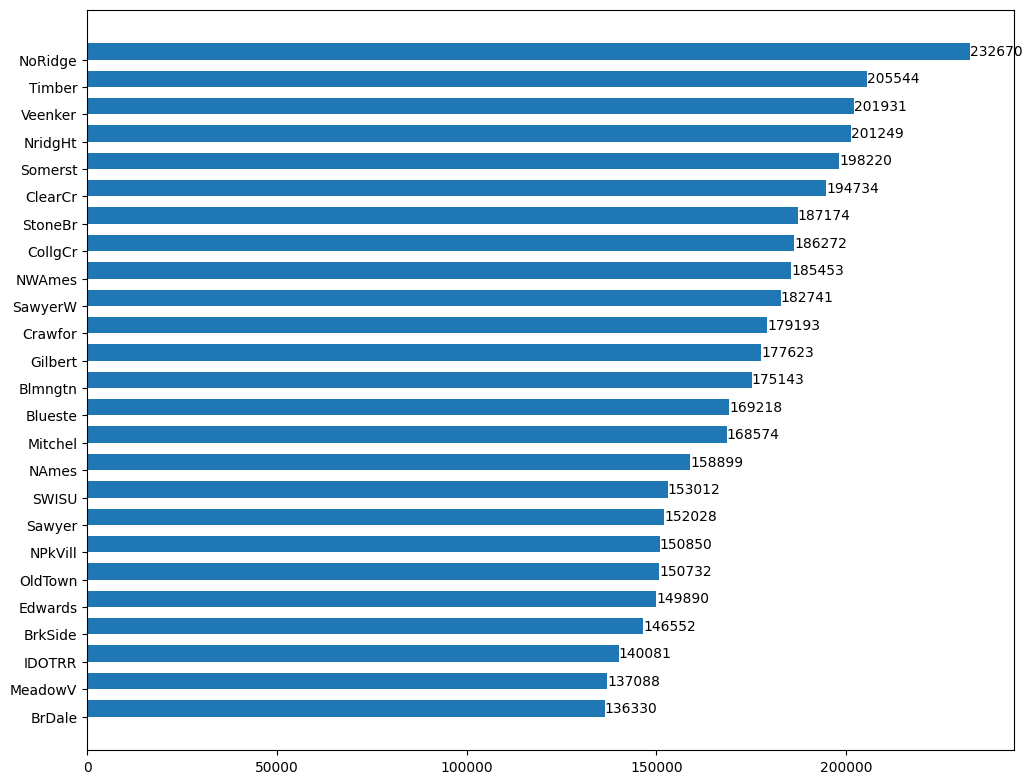

In [231]:
prices = df.groupby("Neighborhood")["SalePrice"].mean().to_dict()
prices = dict(sorted(prices.items(), key = lambda item : item[1] )) 
fig, ax = plt.subplots(figsize=(10,8))
fig.tight_layout()
bars = ax.barh(list(prices.keys()), list(prices.values()) , height=0.6 , align="edge" )
ax.bar_label(bars)
ax.plot

## Top 5s

In [232]:
## 5 Neighborhoods with the most houses
df.groupby("Neighborhood").size().nlargest(5)

Neighborhood
NAmes      417
CollgCr    259
OldTown    228
Somerst    167
Edwards    166
dtype: int64

In [233]:
## 5 Neighberhood with priciest houses
df.groupby("Neighborhood")["SalePrice"].max().nlargest(5)

Neighborhood
NoRidge    340000
Somerst    340000
OldTown    339750
NridgHt    337500
BrDale     335000
Name: SalePrice, dtype: int64

## #Bedrooms Effect on Price

<Axes: title={'center': 'SalePrice'}, xlabel='BedroomAbvGr'>

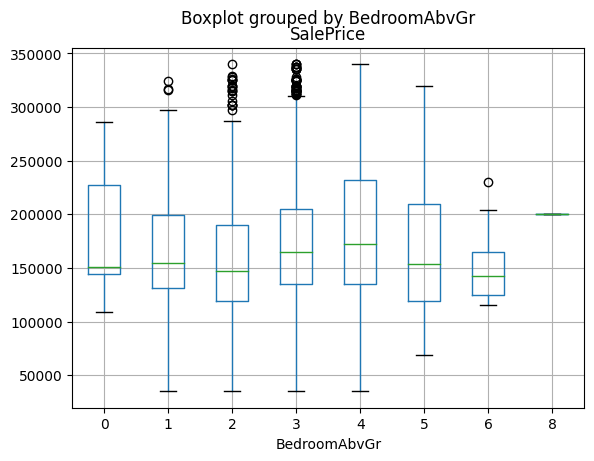

In [234]:
## The Effect of Number of Bedrooms on Price 
df.boxplot(column="SalePrice", by="BedroomAbvGr")

In [235]:
# Checkout SNS BoxPlot

## Correlation Analysis

/tmp/ipykernel_3408/570970446.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


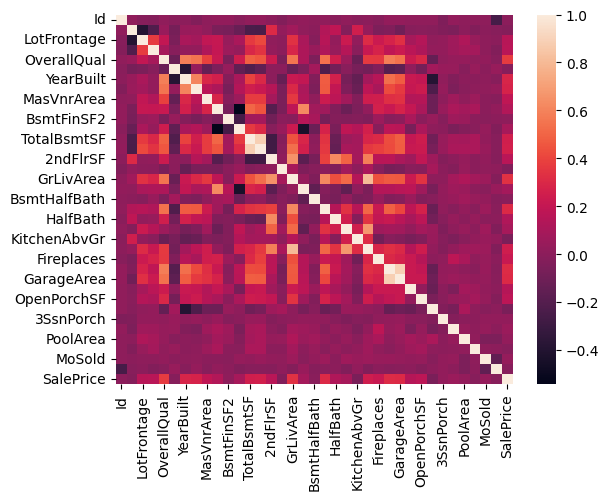

In [236]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

In [237]:
corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()

Id             Id              1.000000
GarageArea     GarageCars      0.884031
1stFlrSF       TotalBsmtSF     0.879483
GrLivArea      TotRmsAbvGrd    0.801223
BedroomAbvGr   TotRmsAbvGrd    0.674247
                                 ...   
YearBuilt      OverallCond    -0.383019
EnclosedPorch  YearBuilt      -0.386305
LotFrontage    MSSubClass     -0.394928
BsmtFullBath   BsmtUnfSF      -0.439871
BsmtFinSF1     BsmtUnfSF      -0.542984
Length: 667, dtype: float64

## House Prices Distribution

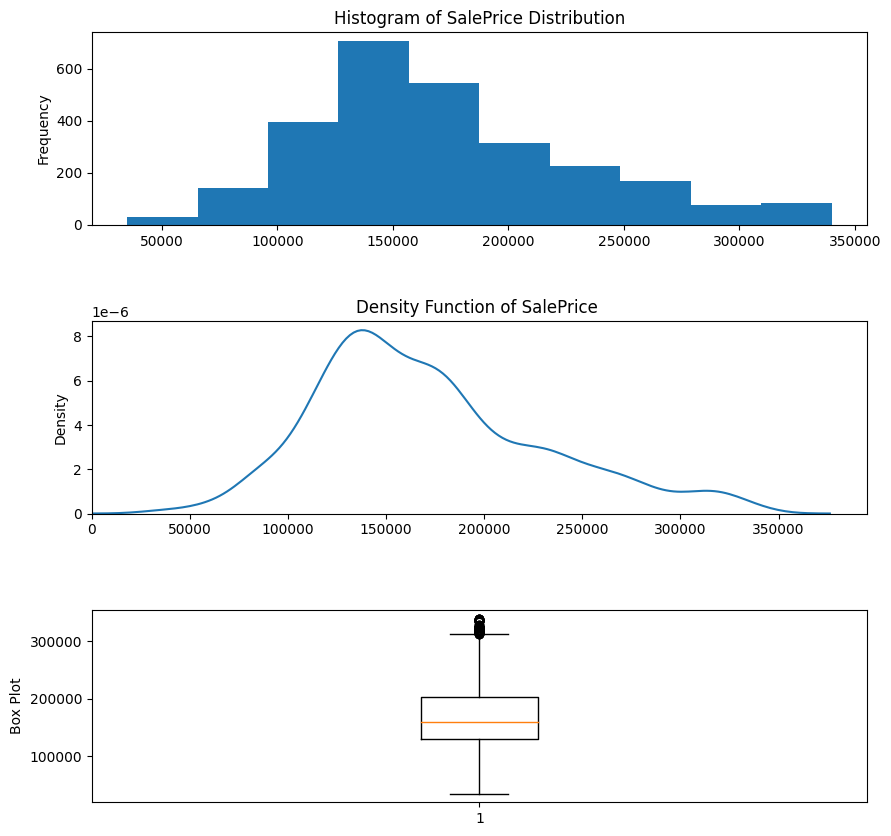

In [238]:
data = df["SalePrice"].to_numpy()
fig , axes = plt.subplots(nrows=3,ncols=1,figsize=(10,10))
fig.subplots_adjust(hspace=0.5)
axes[0].hist(data)
axes[0].set_title("Histogram of SalePrice Distribution")
axes[0].set_ylabel("Frequency")
sns.kdeplot(data, ax=axes[1])
axes[1].set_title("Density Function of SalePrice ")
axes[1].set_xlim(0)
axes[2].boxplot(data, whis=1.5)
axes[2].set_ylabel("Box Plot")
plt.show()

## Scatter Plot with Color

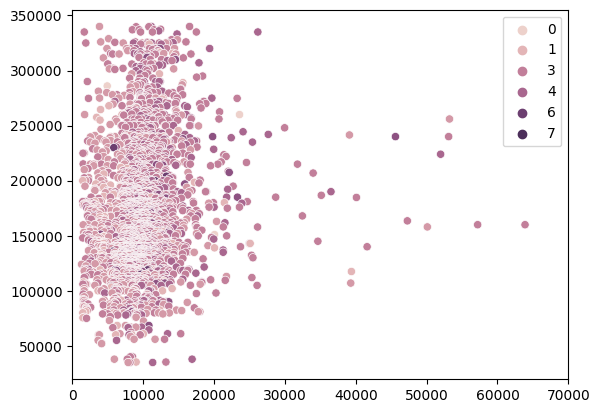

In [239]:
sns.scatterplot(x=df["LotArea"].to_list(), y=df["SalePrice"].to_list() , hue=df["BedroomAbvGr"].to_list())
plt.xlim(0,70000)
plt.show()